# Import data and set default options

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 
from scipy.stats import randint
import lazypredict
from lazypredict.Supervised import LazyClassifier

df1 = pd.read_csv('data/sm_data_features_extensive.csv')

# set default options for libraries:

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_style("white")
sns.set_palette("mako")

### Note: This data set contains various molecular parameters and Morgan fingerprints

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6809 entries, 0 to 6808
Columns: 1042 entries, ChEMBL ID to Bit_1023
dtypes: float64(13), int64(1024), object(5)
memory usage: 54.1+ MB


# Prepare dataset and train multiple ML models

In [3]:
#preprocess data, specifically the target
#rerunning this cell will disrupt the target column
df1['Max Phase'] = df1['Max Phase'].map({1:0,2:1,3:2,4:3})

In [4]:
#classify features and the final target
X = df1.drop(['Max Phase', 'ChEMBL ID', 'InChI Key', 'Name', 'SMILES', 'Type'], axis=1)
Y = df1['Max Phase']

#normalize feature data before training models (min max model)
#brings all values into a similar range to reduce potential bias
X_norm = (X-X.min())/(X.max()-X.min())

#split dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2)

In [5]:
# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [04:20<00:00,  8.98s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [03:55<00:00,  8.11s/it]


In [6]:
predictions_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.62,0.45,None,0.59,1.54
XGBClassifier,0.60,0.42,None,0.57,13.61
ExtraTreesClassifier,0.61,0.42,None,0.56,5.18
RandomForestClassifier,0.62,0.41,None,0.56,4.11
SVC,0.62,0.40,None,0.55,27.94
ExtraTreeClassifier,0.52,0.39,None,0.52,0.32
BaggingClassifier,0.55,0.39,None,0.53,7.97
BernoulliNB,0.50,0.38,None,0.49,0.40
NearestCentroid,0.48,0.38,None,0.48,0.36


# Run best model

In [7]:
#Improve hyperparameters for the classifier model
#The code below is used in case we want to explore model optimization. 
#This is usually not needed as the classifier does a good job for this dataset.

#     param_dist = {'n_estimators': randint(100,200),
#                   'max_depth': randint(80,100)}

#     # Create a random forest classifier
#     clf = ExtraTreesClassifier()

#     # Use random search to find the best hyperparameters
#     rand_search = RandomizedSearchCV(clf, 
#                                      param_distributions = param_dist, 
#                                      n_iter=5, 
#                                      cv=5)

#     # Fit the random search object to the data
#     rand_search.fit(X_train, Y_train)

#     # Create a variable for the best model
#     best_rf = rand_search.best_estimator_

#     # Print the best hyperparameters
#     print('Best hyperparameters:',  rand_search.best_params_)

In [8]:
#train model with optimized parameters
XTclf = ExtraTreesClassifier(n_estimators=200, max_depth=120, random_state=0)
XTclf.fit(X_train, Y_train)

#set up prediction values
Y_pred = XTclf.predict(X_test)

# Evaluate the model

In [9]:
#General prediction scores
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='micro')
recall = recall_score(Y_test, Y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6145374449339207
Precision: 0.6145374449339207
Recall: 0.6145374449339207


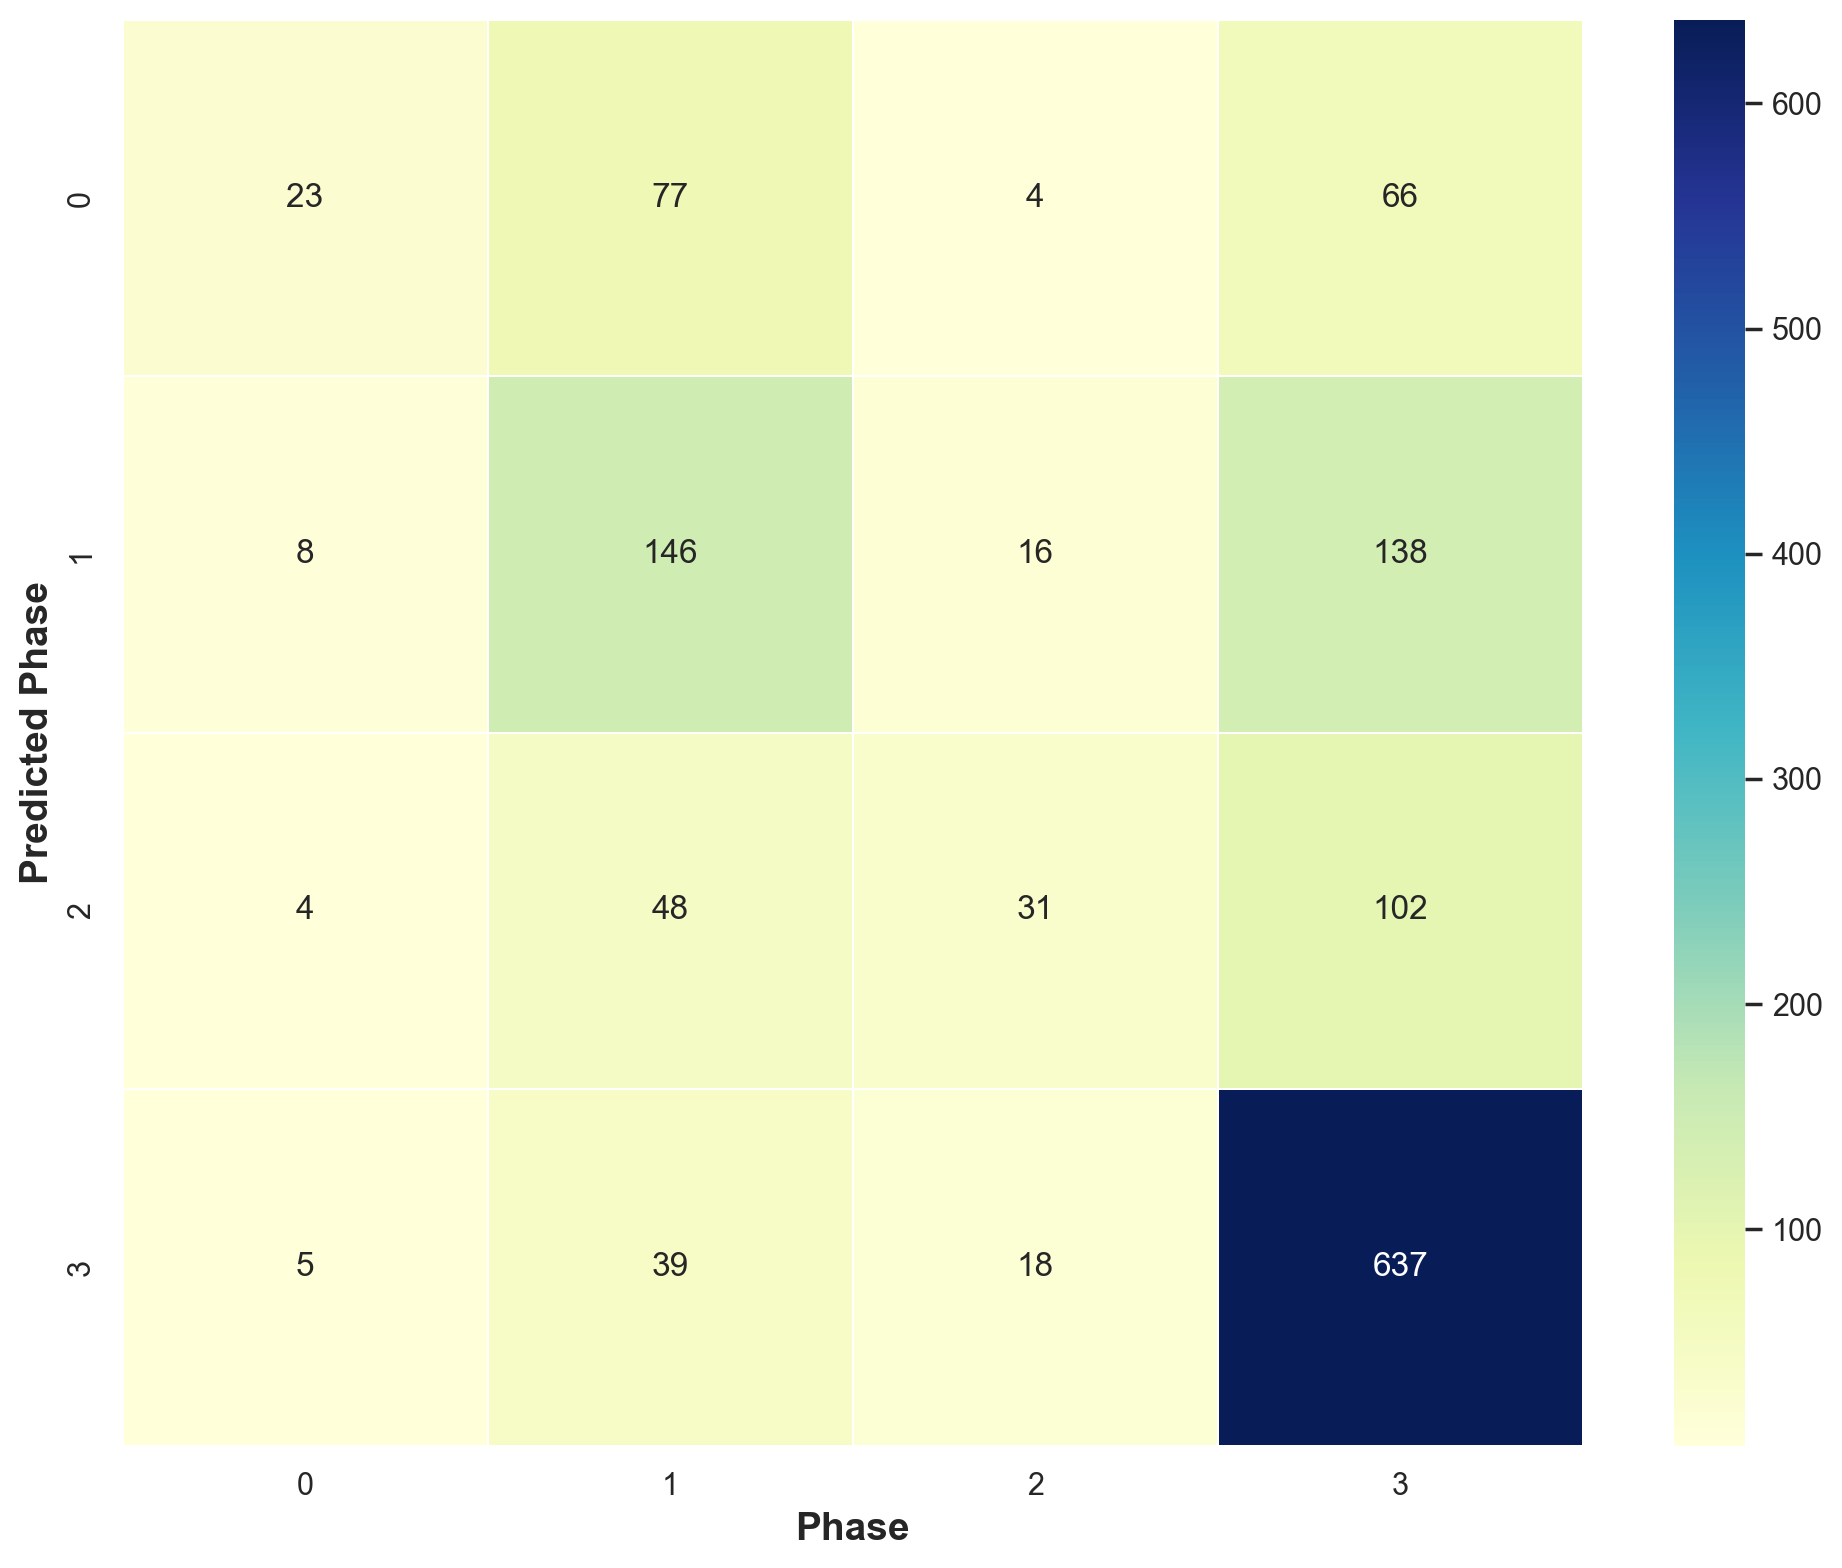

In [10]:
#confusion matrix to compare actual and predicted targets
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(10,8))

sns.heatmap(cm, linewidth=.1, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Phase', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Phase', fontsize=14, fontweight='bold')
plt.tight_layout()

plt.show()

#ConfusionMatrixDisplay(confusion_matrix=cm).plot()

#Phase1 = 0, Phase2 = 1, Phase3 = 2, Approved = 3

In [11]:
# Create a series containing feature importances from the model and feature names from the training data
    # feature_importances = pd.Series(XTclf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

    # df2 = pd.DataFrame(feature_importances)
    # df2.reset_index(inplace=True)
    # df2.rename(columns={'index':'Feature', 0:'Value'}, inplace=True)
    # df2

    # # Plot a simple bar chart
    # plt.figure(figsize=(10,10))

    # sns.barplot(data=df2, x='Feature', y='Value', palette='mako')
    # plt.xlabel('Phase', fontsize=14, fontweight='bold')
    # plt.ylabel('Importance Score', fontsize=14, fontweight='bold')
    # plt.xticks(rotation=70)
    # plt.tight_layout()

    # plt.show()

# Summary

### The machine learning model provides an accuracy of around 61.5% for this dataset. Based on the confusion matrix data, this model based on general molecular and Morgan fingerprint parameters has much improved predictions across all phases. The addition of the Morgan finderprints improved the model significantly.

### Note: The importance of each feature were not evaluated due to the large number of features.